In [ ]:
# the goal is to find trends in data. Altough Pokemon are a fun game there can be lots of ways to 
#optimize and stragetgize

In [ ]:
#first is there any correlations between hp and atk. 

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import ipywidgets as widegts
from IPython.display import display

pokedata = pd.read_csv("pokemon.csv")

In [30]:
pokedata

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


In [49]:
pokedata.describe()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,445.219216,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776
std,267.772806,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,209.750000,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000
50%,442.500000,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,681.250000,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


<Axes: >

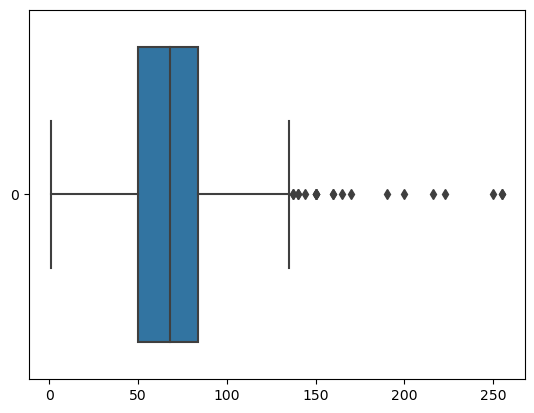

In [55]:
sns.boxplot(pokedata['hp'], orient = 'h')

<Axes: >

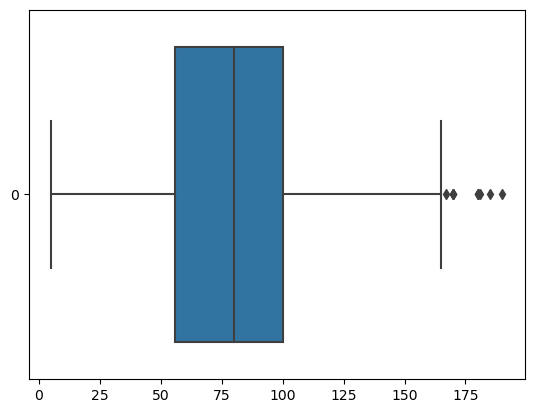

In [54]:
sns.boxplot(pokedata['attack'], orient = 'h')

<Axes: >

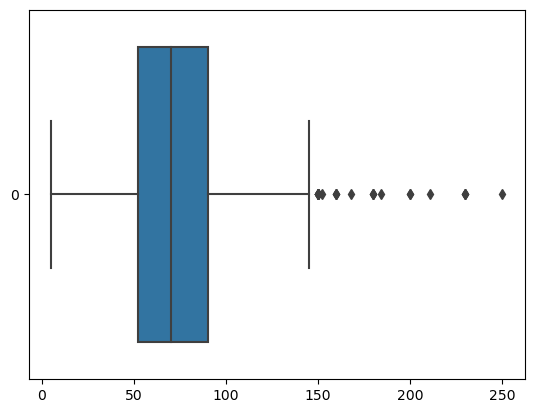

In [56]:
sns.boxplot(pokedata['defense'], orient = 'h')

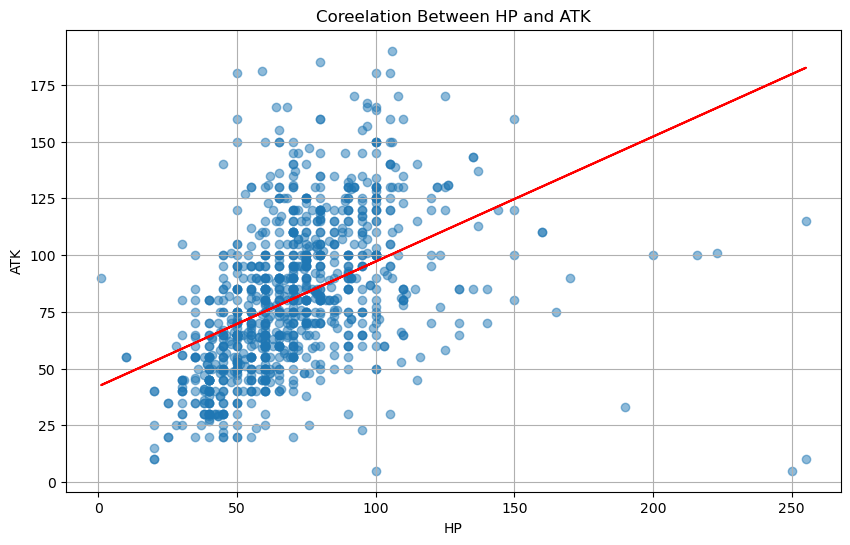

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(pokedata['hp'], pokedata['attack'], alpha = 0.5)
plt.title('Coreelation Between HP and ATK')
plt.xlabel('HP')
plt.ylabel('ATK')
plt.grid(True)

slope, intercept, r_value, p_value, std_err = linregress(pokedata['hp'], pokedata['attack'])

plt.plot(pokedata['hp'],intercept + slope*pokedata['hp'],'r', label = 'Line of Best Fit')

In [19]:
print(f"The equation of the line is: y = {slope:.2f}x + {intercept:.2f}")

The equation of the line is: y = 0.55x + 42.16


In [48]:
def calculate_y(x):
    y = 0.55 * x + 42.16
    y_display.value = f'The value of y is: {y:.2f}'

# Create a slider for input x
x_slider = widgets.FloatSlider(value=50, min=0, max=100, step=1, description='X Value:', readout=True)

# Create a display widget
y_display = widgets.Label(value='The value of y is: 70.16')  # Initial display value based on default slider value

# Use interactive function to link slider and display
interactive_calculation = widgets.interactive(calculate_y, x=x_slider)

# Display the widgets
display(x_slider, y_display)

FloatSlider(value=50.0, description='X Value:', step=1.0)

Label(value='The value of y is: 69.66')

In [ ]:
#This means that the line of best fit is y = 0.55x + 42.16
#The reason I did linear regression over any other regression model
#is because the graph is mostly linear. 
#In other words as HP increases then ATK does as well
#This could be due to how pokemon evolutions work
#as you evolve your pokemon your atk and hp increase. 
#this graph shows it!
#there is a clear correlation between hp and atk
#with few outliers!

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the data
data = pd.read_csv('pokemon.csv')

# Step 2: Data preprocessing
# Handle missing values (assuming 'NaN' should be replaced with the mean or a specific value)
data.fillna(0, inplace=True)

# Convert categorical variables to numeric if necessary (using get_dummies)
X = pd.get_dummies(data.drop('legendary', axis=1))  # Assuming 'legendary' is the target
y = data['legendary']

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 6: Use the model for new predictions
# Example: predict a new instance (format the new instance as the model expects)
new_instance = {'feature1': 'value1', 'feature2': 'value2'}  # Replace 'feature1', 'value1', etc. with actual column names and their values
new_data = pd.DataFrame([new_instance])
new_data = pd.get_dummies(new_data)
# Aligning new data columns with training data columns
new_data = new_data.reindex(columns=X.columns, fill_value=0)

predicted_class = rf.predict(new_data)
print("Predicted Class:", predicted_class)


Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       190
        True       0.94      0.64      0.76        25

    accuracy                           0.95       215
   macro avg       0.95      0.82      0.87       215
weighted avg       0.95      0.95      0.95       215

Predicted Class: [False]


In [ ]:
#very accurate when it comes to false because of how imbalenced the data set it is 
#there are not many legendaries compared to non-legendaries